In [1]:
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
% matplotlib inline

In [2]:
penguins = pd.read_csv("./penguins_size.csv")
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
penguins = penguins.dropna()
penguins.species_short.value_counts()
reducer = umap.UMAP()
penguin_data = penguins[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values  # 选取指定列
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)  # 标准化
embedding = reducer.fit_transform(scaled_penguin_data)

Text(0.5, 1.0, 'UMAP projection of the Penguin dataset')

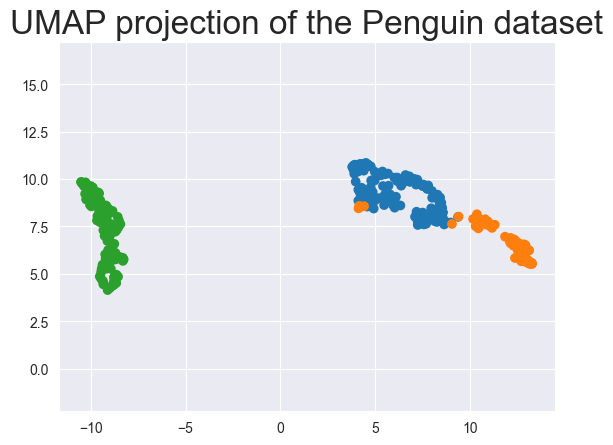

In [4]:
plt.scatter(embedding[:, 0], embedding[:, 1],
            c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie": 0, "Chinstrap": 1, "Gentoo": 2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)